In [1]:
# Data to train on (all works of shakesphere combined into one text file)
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-07-04 12:15:44--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.1s    

2024-07-04 12:15:44 (10.0 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [1]:
with open('input.txt', 'r') as file:
    text = file.read()

In [2]:
print(len(text))
print(text[:1000])

1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for re

In [3]:
# extract all unique chars from the entire corpus
all_chars = sorted(list(set(text)))
print("".join(all_chars))
len(all_chars)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


65

In [4]:
# creating a tokenizer at char level

stoi = {char:i for i, char in enumerate(all_chars)}
itos = {i:char for i, char in enumerate(all_chars)}

encode = lambda x: [stoi[char] for char in x]
decode = lambda x: ''.join([itos[i] for i in x])

In [5]:
decode(encode("you are a good boy"))

'you are a good boy'

In [6]:
import torch

encoded_text = torch.tensor(encode(text), dtype=torch.long)
print(encoded_text.shape, encoded_text.dtype)

torch.Size([1115394]) torch.int64


In [7]:
encoded_text[:1000]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [8]:
# split corpus into train and validation sets

split_n_idx = int(0.9 * len(text))
train_data = encoded_text[:split_n_idx]
val_data = encoded_text[split_n_idx:]

print(len(train_data), len(val_data), len(train_data)+len(val_data))

1003854 111540 1115394


In [9]:
# context length declared here
# bc the transformer cant take the full sequence, it would bee too long and computationally infeasible for large corpus bc of the n^2 attention mechanism whee n is the num of token in the sequence
# so we declare a smaller batch to be the input per training sample

block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [10]:
x = train_data[:block_size]
y = train_data[1:block_size+1]

for i in range(len(x)):
    print(f"if input is {x[:i+1]} then output should be {y[i]}")

if input is tensor([18]) then output should be 47
if input is tensor([18, 47]) then output should be 56
if input is tensor([18, 47, 56]) then output should be 57
if input is tensor([18, 47, 56, 57]) then output should be 58
if input is tensor([18, 47, 56, 57, 58]) then output should be 1
if input is tensor([18, 47, 56, 57, 58,  1]) then output should be 15
if input is tensor([18, 47, 56, 57, 58,  1, 15]) then output should be 47
if input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) then output should be 58


In [11]:
torch.manual_seed(1337)
block_size = 8
batch_size = 4

In [12]:
def get_batch(split: str, batch_size: int):
    data = train_data if split.lower() == "train" else val_data
    ix = torch.randint(len(data)-block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

In [13]:
xb, yb = get_batch("train", batch_size=4)
print(xb.shape, yb.shape)
print(xb)
print(yb)

for i in range(batch_size):
    for j in range(block_size):
        xi = xb[i, :j+1]
        yo = yb[i, j]
        print(f"Given {xi} target is: {yo}")

torch.Size([4, 8]) torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
Given tensor([24]) target is: 43
Given tensor([24, 43]) target is: 58
Given tensor([24, 43, 58]) target is: 5
Given tensor([24, 43, 58,  5]) target is: 57
Given tensor([24, 43, 58,  5, 57]) target is: 1
Given tensor([24, 43, 58,  5, 57,  1]) target is: 46
Given tensor([24, 43, 58,  5, 57,  1, 46]) target is: 43
Given tensor([24, 43, 58,  5, 57,  1, 46, 43]) target is: 39
Given tensor([44]) target is: 53
Given tensor([44, 53]) target is: 56
Given tensor([44, 53, 56]) target is: 1
Given tensor([44, 53, 56,  1]) target is: 58
Given tensor([44, 53, 56,  1, 58]) target is: 46
Given tensor([44, 53, 56,  1, 58, 46]) target 

In [14]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()

        embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        logits = embedding_table(idx)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            logits, loss = self(idx)
            logits = logits[:, -1, :]

            probs = F.softmax(logits, dim=-1)

            idx_next = torch.multinomial(probs, num_samples=1)

            idx = torch.cat((idx, idx_next), dim=1)
        return idx


In [15]:
model = BigramLanguageModel(65)
logits, loss = model(xb, yb)
print(logits.shape, loss)

torch.Size([32, 65]) tensor(4.8786, grad_fn=<NllLossBackward0>)


In [16]:
idx = torch.zeros((1, 1), dtype=torch.long)
result = model.generate(idx, max_new_tokens=50)

print(result)
print(decode(result[0].tolist()))

tensor([[ 0, 31, 23, 21, 41, 24, 32, 11, 13, 41, 17, 24, 25, 53, 32, 40, 60, 38,
         60,  1, 15, 12, 52, 55,  7, 29, 17,  9,  9, 10, 15, 22, 55, 49, 27, 23,
         20,  7, 55, 11, 10, 50, 39,  2, 53, 47, 63, 61, 49, 20, 48]])

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHj


In [17]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [23]:
batch_size = 32

for step in range(10000):
    xb, yb = get_batch('train', batch_size)

    logits, loss = model(xb, targets=yb)
    
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())
    

2.45680570602417


In [27]:
idx = torch.zeros((1, 1), dtype=torch.long)
result = model.generate(idx, max_new_tokens=500)

print(decode(result[0].tolist()))


UClwanovead her t t APAUESLANEd titrake! GLTathed s,
RI lk.
Anordenare pine thal wh,
T:


eve,


Wheathas wouns Ply
MI lif corndiver ve. he thoutasen at, ond tren: ibrmesanouse hat rait ge kfals.
Ge Goowhe.
Mears is ise henel t gherdf meve.
OKIVEENG ol by t?
ANNGr uenowhisstee be
G bll ICleer sly f gs and tougr come te bue misein aip:
MBRGllinfre e pe mfas ale Fr?
CEro nd, dare is th we we wes?
DUS:
N HEdigen's y ple th mest r w be prm an sll ck y h ind, athoulkeavo An us ding bang aulcal ppe th


In [88]:
torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [89]:
xbow = torch.zeros((B, T, C))

for b in range(B):
    for t in range(T):
        xprev = x[b, :t+1]
        xbow[b, t] = torch.mean(xprev, 0)


In [90]:
x[0], xbow[0]

(tensor([[ 0.1808, -0.0700],
         [-0.3596, -0.9152],
         [ 0.6258,  0.0255],
         [ 0.9545,  0.0643],
         [ 0.3612,  1.1679],
         [-1.3499, -0.5102],
         [ 0.2360, -0.2398],
         [-0.9211,  1.5433]]),
 tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]))

In [91]:
torch.manual_seed(42)

a = torch.tril(torch.ones(3,3))
a = a / torch.sum(a, dim=1, keepdim=True)
b = torch.randint(0, 10, (3, 2)).float()
c = a @ b

print(f"{a}\n{b}\n{c}")

tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [92]:
wei = torch.tril(torch.ones(T, T))
wei = wei / torch.sum(wei, dim=1, keepdim=True)
xbow2 = wei @ x
torch.allclose(xbow, xbow2)

True

In [93]:
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros(T, T)
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = wei.softmax(-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)
xbow3[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [99]:
torch.manual_seed(1337)
B, T, C = 4, 8, 32
x = torch.randn(B, T, C)

# self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x) # (B, T, head_size)
q = query(x) # (B, T, head_size)

wei = q @ k.transpose(-2, -1) # (B, T, T)
wei = wei * head_size**-0.5 # normalization so the wei values are evenly diffused instead of having too high of a value in one node which will make the softmax "spiky"(focused on a single node, instead of ~evenly across all)

tril = torch.tril(torch.ones(T, T))
# wei = torch.zeros(T, T)
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = wei.softmax(-1)

wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5150, 0.4850, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3342, 0.2973, 0.3686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2330, 0.1956, 0.2701, 0.3013, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2028, 0.2231, 0.1988, 0.1965, 0.1788, 0.0000, 0.0000, 0.0000],
        [0.1514, 0.1827, 0.1263, 0.1103, 0.1483, 0.2809, 0.0000, 0.0000],
        [0.1438, 0.1328, 0.1517, 0.1577, 0.1505, 0.1194, 0.1442, 0.0000],
        [0.1049, 0.1558, 0.0818, 0.0683, 0.0813, 0.2506, 0.1041, 0.1533]],
       grad_fn=<SelectBackward0>)

In [98]:
v = value(x)
xbow4 = wei @ v
wei.shape, v.shape, xbow4.shape, v[0], wei[0]

(torch.Size([4, 8, 8]),
 torch.Size([4, 8, 16]),
 torch.Size([4, 8, 16]),
 tensor([[ 0.0660,  0.0865, -0.0022, -0.0979,  0.0494, -0.0847, -0.1617, -0.0495,
           0.1284,  0.1332,  0.0091,  0.0597,  0.1579, -0.0382,  0.0418, -0.0894],
         [-0.5969,  0.1531, -0.4713, -0.3066,  0.6378,  0.4022, -0.3253,  0.2137,
          -0.0749,  0.3800,  0.3823, -0.2537,  0.3899, -0.0850, -0.3499, -0.4370],
         [ 0.3468,  0.2170,  0.1132, -0.2115, -0.0160, -0.3525, -0.3953, -0.2007,
           0.3985,  0.2972, -0.0700,  0.2409,  0.3679, -0.0912,  0.2126, -0.1533],
         [ 0.5402,  0.3231,  0.1842, -0.3105, -0.0421, -0.5434, -0.5874, -0.3089,
           0.6036,  0.4377, -0.1165,  0.3708,  0.5441, -0.1352,  0.3307, -0.2190],
         [ 0.7093, -0.2305,  0.5855,  0.4262, -0.8141, -0.4590,  0.4793, -0.2418,
           0.0326, -0.5338, -0.4784,  0.2866, -0.5577,  0.1233,  0.4144,  0.5839],
         [-0.9490, -0.3276, -0.4496,  0.2398,  0.3522,  0.8613,  0.5735,  0.4826,
          -0.7818, 

In [102]:
tril = torch.tril(torch.ones(T, T))
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [103]:
tril[:T, :T]

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

### GPT from scratch from memory

In [34]:
import torch


ctx_len = 16
batch_size = 4
n_embed = 32
head_size = 16

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# Open data file
with open("input.txt", "r") as file:
    text = file.read()

# calculate vocab and vocab_size
unique_chars = sorted(list(set(text)))
vocab = unique_chars
vocab_size = len(unique_chars)

# make tokenizer with encode and decode functions
stoi = {char: i for i, char in enumerate(vocab)}
itos = {i: char for i, char in enumerate(vocab)}

encode = lambda prompt: [stoi[char] for char in prompt]
decode = lambda tokens: "".join([itos[i] for i in tokens])

In [26]:
# encode and split text into train and validation sets
encoded_text = torch.tensor(encode(text))
split_idx = int(0.9 * len(encoded_text))
train_data = encoded_text[:split_idx]
val_data = encoded_text[split_idx:]

In [27]:
len(train_data), len(val_data), len(train_data)+len(val_data) == len(encoded_text)

(1003854, 111540, True)

In [38]:
def batch_data():
    sample_idxs = torch.randint(len(train_data) - ctx_len, (batch_size,))
    input_data = torch.stack([train_data[idx: idx+ctx_len] for idx in sample_idxs])
    expected_data = torch.stack([train_data[idx+1: idx+ctx_len+1] for idx in sample_idxs])
    
    input_data.to(device)
    expected_data.to(device)
    
    return input_data, expected_data

In [51]:
x, y = batch_data()
x.shape

torch.Size([4, 16])

In [22]:
for i in sample_idxs:
    print(i)
    print(train_data[i: i+ctx_len])
    print(":"*100)

tensor(502859)
[47, 57, 57, 1, 41, 53, 52, 57, 59, 51, 43, 10, 1, 58, 46, 43]
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
tensor(645403)
[53, 52, 42, 43, 56, 1, 47, 52, 1, 43, 62, 58, 56, 43, 51, 43]
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
tensor(597081)
[57, 1, 54, 47, 43, 56, 41, 47, 52, 45, 1, 58, 39, 50, 53, 52]
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
tensor(148360)
[43, 1, 56, 53, 59, 45, 46, 6, 1, 59, 52, 57, 61, 39, 63, 39]
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


In [2]:
import torch
device = 'cpu'

ctx_len = 4
n_embed = 3

torch.arange(ctx_len, , device=device)

TypeError: arange() received an invalid combination of arguments - got (int, tuple, device=str), but expected one of:
 * (Number end, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, *, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, Number step, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


# from scratch GPT-2 (tinkering section)

In [3]:
from transformers import GPT2LMHeadModel

model_hf =GPT2LMHeadModel.from_pretrained("gpt2") # 124M param model
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [24]:
import torch
from torch import Tensor
st = torch.rand((1, 1, 12))
print(st)
q, k, v = st.split(4, dim=2)
q: Tensor = q
print(q, k, v)

# q.view(q.size(0), q.size(1), 2, q.size(2) // 2)

wei = torch.randn((4, 4))
bias = torch.tril(torch.ones(4, 4))
print(wei)
print(bias)
wei.masked_fill(bias == 0, float('-inf'))

tensor([[[0.0261, 0.4674, 0.0604, 0.8971, 0.8544, 0.0498, 0.7623, 0.6229,
          0.7601, 0.1649, 0.1788, 0.5903]]])
tensor([[[0.0261, 0.4674, 0.0604, 0.8971]]]) tensor([[[0.8544, 0.0498, 0.7623, 0.6229]]]) tensor([[[0.7601, 0.1649, 0.1788, 0.5903]]])
tensor([[-0.3119,  0.2621, -0.6726, -0.1256],
        [ 0.0124,  0.3913, -0.4530, -0.0064],
        [ 1.2756, -0.3220,  1.0417,  0.7482],
        [-0.7600, -0.4858, -0.3814, -0.2147]])
tensor([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]])


tensor([[-0.3119,    -inf,    -inf,    -inf],
        [ 0.0124,  0.3913,    -inf,    -inf],
        [ 1.2756, -0.3220,  1.0417,    -inf],
        [-0.7600, -0.4858, -0.3814, -0.2147]])

In [5]:
from dataclasses import dataclass

@dataclass
class GPTConfig:
    block_size: int = 2
    vocab_size: int = 50304 # GPT-2 vocab_size of 50257, padded up to nearest multiple of 64 for efficiency
    n_layer: int = 12
    n_head: int = 3
    n_embd: int = 12
    dropout: float = 0.0
    bias: bool = True # True: bias in Linears and LayerNorms, like GPT-2. False: a bit better and faster

config = GPTConfig

In [6]:
class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        # regularization
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.dropout = config.dropout
        # flash attention make GPU go brrrrr but support is only in PyTorch >= 2.0
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")
            # causal mask to ensure that attention is only applied to the left in the input sequence
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                        .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        if self.flash:
            # efficient attention using Flash Attention CUDA kernels
            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)
        else:
            # manual implementation of attention
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_dropout(self.c_proj(y))
        return y

In [7]:
import torch
from torch import nn
c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)

In [8]:
c_attn

Linear(in_features=12, out_features=36, bias=True)

In [22]:
x = torch.randint(0, 3, (1, config.block_size, config.n_embd), dtype=torch.float)
print(x.shape)
B, T, C = x.shape
q, k, v  = c_attn(x).split(config.n_embd, dim=2)

torch.Size([1, 2, 12])


In [29]:
c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
x = torch.randint(0, 3, (1, config.block_size, config.n_embd), dtype=torch.float)
x = torch.ones((1, config.block_size, config.n_embd), dtype=torch.float)
print(x, x.shape, x.dtype)
c_attn(x) # RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Float

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]]) torch.Size([1, 2, 12]) torch.float32


tensor([[[ 1.3409, -1.2845,  0.6112,  0.9483,  1.0688, -0.0862, -0.3374,
          -0.0135, -0.6908,  0.8617, -1.5078, -0.1678,  0.0754,  0.1991,
          -0.0390, -0.9109, -0.2457,  1.2713, -0.0972,  0.1241, -0.4713,
          -0.0112, -1.2633,  0.6746, -0.1899, -0.3594,  0.2570, -0.2694,
          -0.2057, -0.4346,  0.6963, -1.2675, -0.3681,  0.7449,  0.5082,
          -0.1041],
         [ 1.3409, -1.2845,  0.6112,  0.9483,  1.0688, -0.0862, -0.3374,
          -0.0135, -0.6908,  0.8617, -1.5078, -0.1678,  0.0754,  0.1991,
          -0.0390, -0.9109, -0.2457,  1.2713, -0.0972,  0.1241, -0.4713,
          -0.0112, -1.2633,  0.6746, -0.1899, -0.3594,  0.2570, -0.2694,
          -0.2057, -0.4346,  0.6963, -1.2675, -0.3681,  0.7449,  0.5082,
          -0.1041]]], grad_fn=<ViewBackward0>)

In [ ]:
c_attn(x)

In [16]:
c_attn(x).split(config.n_embd, dim=2)

(tensor([[[-0.7899,  0.1959,  0.4042, -0.3287, -1.1043, -0.1111,  0.2066,
           -1.6848,  0.1115, -0.2385, -0.0914, -0.6865],
          [-0.7899,  0.1959,  0.4042, -0.3287, -1.1043, -0.1111,  0.2066,
           -1.6848,  0.1115, -0.2385, -0.0914, -0.6865]]],
        grad_fn=<SplitBackward0>),
 tensor([[[ 0.2789, -0.5755,  0.5930, -0.3427,  0.5123,  0.0179,  0.2183,
            0.5700,  0.1906,  0.2156, -0.8103,  0.0099],
          [ 0.2789, -0.5755,  0.5930, -0.3427,  0.5123,  0.0179,  0.2183,
            0.5700,  0.1906,  0.2156, -0.8103,  0.0099]]],
        grad_fn=<SplitBackward0>),
 tensor([[[-0.1589, -0.5359, -0.5295, -0.2036, -0.0122, -0.4513,  0.1256,
            0.1415,  0.0042, -0.6327,  0.8625,  0.3494],
          [-0.1589, -0.5359, -0.5295, -0.2036, -0.0122, -0.4513,  0.1256,
            0.1415,  0.0042, -0.6327,  0.8625,  0.3494]]],
        grad_fn=<SplitBackward0>))

In [11]:
q.shape, q.size()

(torch.Size([1, 2, 12]), torch.Size([1, 2, 12]))

In [49]:
q_v = q.view(B, T, config.n_head, C // config.n_head).transpose(1, 2) # torch.Size([1, 3, 2, 4])
k_v = k.view(B, T, config.n_head, C // config.n_head).transpose(1, 2) # torch.Size([1, 3, 2, 4])
print(q_v.shape)
print(k_v.shape)

torch.Size([1, 3, 2, 4])
torch.Size([1, 3, 2, 4])


In [67]:
print(k_v.transpose(-2,-1).shape)
wei = q_v @ k_v.transpose(-2,-1) # (B, n_head, T, head_size) @ (B, n_head, head_size , T) -> (B, n_head, T, T)

out = wei @ q_v
out.shape

torch.Size([1, 3, 4, 2])


torch.Size([1, 3, 2, 4])

In [68]:
torch.cat(out, dim=1)

TypeError: cat() received an invalid combination of arguments - got (Tensor, dim=int), but expected one of:
 * (tuple of Tensors tensors, int dim, *, Tensor out)
 * (tuple of Tensors tensors, name dim, *, Tensor out)


In [64]:
l_t = torch.tril(torch.ones(config.block_size, config.block_size)).view(1, 1, config.block_size, config.block_size)
l_t

tensor([[[[1., 0.],
          [1., 1.]]]])

In [2]:
with open("../input.txt", "r") as file:
    text = file.read()

encoded_text = enc.encode(text)
B, T = 4, 32
buf = torch.tensor(encoded_text[:B*T+1])
x = buf[:-1].view(B, T)
y = buf[1:].view(B, T)

In [10]:
import torch
import tiktoken
enc = tiktoken.get_encoding('gpt2')

encoded_text = enc.encode(text)
B, T = 4, 32
buf = torch.tensor(encoded_text[:B*T+1])
x = buf[:-1].view(B, T)
y = buf[1:].view(B, T)


In [ ]:
class DataloaderLite:
    def __init__(self, B, T) -> None:
        self.B = B
        self.T = T

        with open("../input.txt", "r") as file:
            text = file.read()
        enc = tiktoken.get_encoding('gpt2')
        self.tokens = torch.tensor(enc.encode(text))
        print(f"loaded {len(self.tokens)} tokens")
        print(f"1 epoch = {len(self.tokens) // (B*T)} batches")

        self.current_pos = 0

    def get_batch(self):
        curr_batch = self.tokens[self.current_pos:self.current_pos + (B*T) + 1]
        x = curr_batch[:-1].view(B, T)
        y = curr_batch[1:].view(B, T)

        self.current_pos += B*T

        if self.current_pos + (B*T) + 1 > len(self.tokens):
            self.current_pos = 0
        return x, y

In [11]:
class DataLoaderLite():
    def __init__(self, B, T):
        self.B = B
        self.T = T

        with open("../input.txt", "r") as file:
            text = file.read()
        enc = tiktoken.get_encoding('gpt2')
        self.tokens = torch.tensor(enc.encode(text))
        print(f"loaded {len(self.tokens)} tokens")
        print(f"One epoch = {len(self.tokens) // (B*T)} batches")
        self.current_pos = 0
    
    def get_batch(self):
        B, T = self.B, self.T
        buf = self.tokens[self.current_pos:self.current_pos + B*T + 1]
        
        x = buf[:-1].view(B, T)
        y = buf[1:].view(B, T)

        self.current_pos += B*T
        if self.current_pos + B*T + 1 > len(self.tokens):
            self.current_pos = 0
        
        return x, y


In [14]:
dl = DataLoaderLite(4, 32)

dl.get_batch()

loaded 338025 tokens
One epoch = 2640 batches


(tensor([[ 5962, 22307,    25,   198,  8421,   356,  5120,   597,  2252,    11,
           3285,   502,  2740,    13,   198,   198,  3237,    25,   198,  5248,
            461,    11,  2740,    13,   198,   198,  5962, 22307,    25,   198,
           1639,   389],
         [  477, 12939,  2138,   284,  4656,   621,   284,  1145,   680,    30,
            198,   198,  3237,    25,   198,  4965,  5634,    13, 12939,    13,
            198,   198,  5962, 22307,    25,   198,  5962,    11,   345,   760,
            327,  1872],
         [  385,  1526, 28599,   318,  4039,  4472,   284,   262,   661,    13,
            198,   198,  3237,    25,   198,  1135,   760,   470,    11,   356,
            760,   470,    13,   198,   198,  5962, 22307,    25,   198,  5756,
            514,  1494],
         [  683,    11,   290,   356,  1183,   423, 11676,   379,   674,   898,
           2756,    13,   198,  3792,   470,   257, 15593,    30,   198,   198,
           3237,    25,   198,  2949,   517, 

In [26]:
x = torch.zeros(12)
n = 100
for i in range(n):
    resid_amt = torch.randn(12)
    scaled_resid_amt = resid_amt * n**-0.5
    x += resid_amt
print(x.std())

tensor(9.0430)


In [16]:
import numpy as np
from numpy.linalg import svd

# Step 1: Cosine Similarity
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])
cosine_similarity = np.dot(vector_a, vector_b) / (np.linalg.norm(vector_a) * np.linalg.norm(vector_b))
print("Cosine Similarity:", cosine_similarity)

# Step 2: Creating an Adjacency Matrix
embeddings = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

def cosine_similarity_matrix(embeddings):
    num_vectors = embeddings.shape[0]
    adjacency_matrix = np.zeros((num_vectors, num_vectors))
    for i in range(num_vectors):
        for j in range(num_vectors):
            if i != j:
                adjacency_matrix[i, j] = np.dot(embeddings[i], embeddings[j]) / (np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j]))
    return adjacency_matrix

adj_matrix = cosine_similarity_matrix(embeddings)
print("Adjacency Matrix:\n", adj_matrix)

# Step 3: Singular Value Decomposition (SVD)
U, S, Vt = svd(adj_matrix)
print("Left Singular Vectors (Embeddings):\n", U)

Cosine Similarity: 0.9746318461970762
Adjacency Matrix:
 [[0.         0.97463185 0.95941195]
 [0.97463185 0.         0.99819089]
 [0.95941195 0.99819089 0.        ]]
Left Singular Vectors (Embeddings):
 [[-0.57322641  0.16471728 -0.80267036]
 [-0.58087648 -0.77259253  0.25628752]
 [-0.57792214  0.6131631   0.53855084]]


# exploring other archs to see the internals

In [3]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel

model_hf= AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-uncased")
model_hf_2 = AutoModel.from_pretrained('google-bert/bert-base-uncased')
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


bert.embeddings.word_embeddings.weight torch.Size([30522, 768])
bert.embeddings.position_embeddings.weight torch.Size([512, 768])
bert.embeddings.token_type_embeddings.weight torch.Size([2, 768])
bert.embeddings.LayerNorm.weight torch.Size([768])
bert.embeddings.LayerNorm.bias torch.Size([768])
bert.encoder.layer.0.attention.self.query.weight torch.Size([768, 768])
bert.encoder.layer.0.attention.self.query.bias torch.Size([768])
bert.encoder.layer.0.attention.self.key.weight torch.Size([768, 768])
bert.encoder.layer.0.attention.self.key.bias torch.Size([768])
bert.encoder.layer.0.attention.self.value.weight torch.Size([768, 768])
bert.encoder.layer.0.attention.self.value.bias torch.Size([768])
bert.encoder.layer.0.attention.output.dense.weight torch.Size([768, 768])
bert.encoder.layer.0.attention.output.dense.bias torch.Size([768])
bert.encoder.layer.0.attention.output.LayerNorm.weight torch.Size([768])
bert.encoder.layer.0.attention.output.LayerNorm.bias torch.Size([768])
bert.encoder

In [2]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForMaskedLM.from_pretrained("google-bert/bert-base-uncased")
# model.to('cuda')

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [3]:
import torch.nn.functional as F
from tqdm import tqdm

# Define the input text
input_text = [
    "we are gathered here today to ",
    "we are gathered here today to "
]
# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Number of tokens to predict
n = 10

# Predict the next n tokens
for _ in tqdm(range(n)):
    # Mask the next token
    input_ids = torch.cat([input_ids, torch.tensor([[tokenizer.mask_token_id]])], dim=1) # torch.Size([1, 8])

    # Get the predictions for the masked token
    with torch.no_grad():
        outputs = model(input_ids)
        predictions = outputs.logits # torch.Size([1, 8, 30522])

    idx = predictions[:, -1, :] # torch.Size([1, 30522])
    probs = F.softmax(idx, dim=-1)

    topk_probs, topk_idxs = torch.topk(probs, k=25, dim=-1)
    sampled_tok = torch.multinomial(topk_probs, num_samples=1)
    new_tok = torch.gather(topk_idxs, -1, sampled_tok)

    # Append the predicted token to the input IDs
    input_ids[0, -1] = new_tok

# Decode the final input IDs to get the output text
input_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)

# Print the generated text
print(f"Generated text: {input_text}")

KeyboardInterrupt: 

In [62]:
# Define the input text
input_text = [
    "we are gathered here today to celebrate the life of ",
    "we are gathered here today to celebrate the life of ",
    "we are gathered here today to celebrate the life of ",
]
# Tokenize the input text
input_ids = tokenizer(input_text, return_tensors='pt')
print(input_ids)
tokenizer.batch_decode(input_ids['input_ids'], skip_special_tokens=True) # TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

{'input_ids': tensor([[ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102],
        [ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102],
        [ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


['we are gathered here today to celebrate the life of',
 'we are gathered here today to celebrate the life of',
 'we are gathered here today to celebrate the life of']

In [ ]:
predicted_tok_id = torch.argmax(probs, dim=1)
predicted_tok_id

In [ ]:
tokenizer.convert_ids_to_tokens(predicted_tok_id.tolist())

In [ ]:
input_ids.shape, predictions.shape, idx.shape, probs.shape

In [63]:
input_ids = input_ids['input_ids']
input_ids

tensor([[ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102],
        [ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102],
        [ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102]])

In [67]:
torch.full((input_ids.size(0), 1), 103), torch.full((input_ids.size(0), 1), 103).squeeze()

(tensor([[103],
         [103],
         [103]]),
 tensor([103, 103, 103]))

In [58]:
masked_input_ids = []
for sample in input_ids:
    print(sample)
    masked_input_ids.append(torch.cat([torch.tensor(sample), torch.tensor([tokenizer.mask_token_id])], dim=-1))
masked_input_ids

[101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997, 102]
[101, 2057, 2024, 5935, 2182, 2651, 2000, 102]
[101, 2057, 2024, 5935, 2182, 2651, 2000, 2425, 2026, 2564, 2008, 102]


[tensor([ 101, 2057, 2024, 5935, 2182, 2651, 2000, 8439, 1996, 2166, 1997,  102,
          103]),
 tensor([ 101, 2057, 2024, 5935, 2182, 2651, 2000,  102,  103]),
 tensor([ 101, 2057, 2024, 5935, 2182, 2651, 2000, 2425, 2026, 2564, 2008,  102,
          103])]

In [49]:
input_ids.shape

torch.Size([3, 12])

In [40]:
torch.tensor(input_ids.size(0), tokenizer.mask_token_id).shape

TypeError: tensor() takes 1 positional argument but 2 were given

In [8]:
# Get the predicted token ID for the last masked token
masked_index = torch.where(input_ids == tokenizer.mask_token_id)[1][-1]
predicted_token_id = torch.argmax(predictions[:, masked_index, :], dim=1)

# Append the predicted token to the input IDs
input_ids[0, masked_index] = predicted_token_id

# Decode the final input IDs to get the output text
output_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)

# Print the generated text
print(f"Generated text: {output_text}")

Generated text: the capital of france is paris


In [ ]:
in = "i love dogs"

maked_in = "i [MASK] dogs"

in = "i love dogs [MASK]"
out = "i love dogs very"
in_2 = "i love dogs very [MASK]"

2.9999999999999997e-05
5.9999999999999995e-05
8.999999999999999e-05
0.00011999999999999999
0.00015
0.00017999999999999998
0.00020999999999999998
0.00023999999999999998
0.00026999999999999995
0.0003
0.0002999999999999999
0.0002995838400539722
0.0002983379259803436
0.00029626993925368627
0.0002933926296998457
0.00028972373688902363
0.0002852858807654296
0.0002801064221878024
0.00027421729424061787
0.00026765480535600414
0.00026045941546018383
0.0002526754865245747
0.0002443510090594838
0.00023553730623665305
0.00022628871746483876
0.00021666226336928708
0.00020671729424061788
0.00019651512412054723
0.00018611865278043115
0.00017559197792325906
0.00016499999999999997
0.0001544080220767409
0.0001438813472195688
0.0001334848758794528
0.0001232827057593821
0.00011333773663071286
0.00010371128253516117
9.446269376334689e-05
8.564899094051613e-05
7.732451347542522e-05
6.954058453981609e-05
6.234519464399581e-05
5.5782705759382104e-05
4.989357781219755e-05
4.471411923457034e-05
4.02762631109762

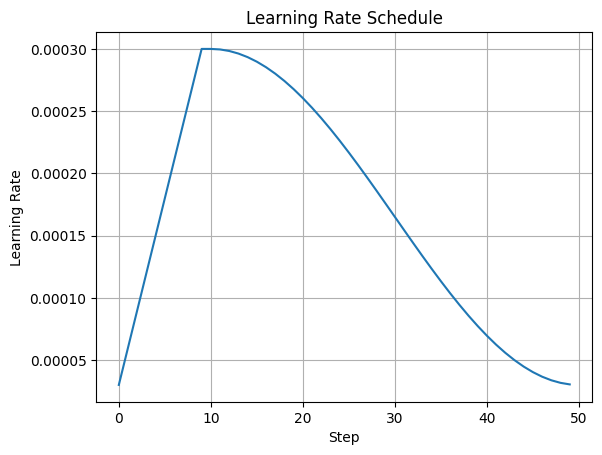

In [11]:
import math
import matplotlib.pyplot as plt
max_lr = 3e-4
min_lr = 3e-4 * 0.1
warmup_steps = 10
total_steps = 50
def get_lr(step):
    if step < warmup_steps:
        return max_lr * (step+1) / warmup_steps
    if step > total_steps:
        return min_lr
    # cosine decay
    decay_ratio = (step - warmup_steps) / (total_steps - warmup_steps)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1 + math.cos(math.pi * decay_ratio))
    return min_lr + coeff * (max_lr - min_lr)      

for i in range(total_steps):
    print(get_lr(i))

lrs = [get_lr(i) for i in range(total_steps)]

plt.plot(range(total_steps), lrs)
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.grid(True)
plt.show()

In [16]:
import torch
from transformers import AutoTokenizer
.from_pretrained("google-bert/bert-base-uncased")


def create_mlm_inputs(inputs, tokenizer, mlm_probability=0.15):
    labels = inputs.clone()
    probability_matrix = torch.full(labels.shape, mlm_probability)
    masked_indices = torch.bernoulli(probability_matrix).bool()
    labels[~masked_indices] = -100  # We only compute loss on masked tokens

    indices_replaced = torch.bernoulli(torch.full(labels.shape, 0.8)).bool() & masked_indices
    inputs[indices_replaced] = tokenizer.convert_tokens_to_ids(tokenizer.mask_token)

    indices_random = torch.bernoulli(torch.full(labels.shape, 0.5)).bool() & masked_indices & ~indices_replaced
    random_words = torch.randint(len(tokenizer), labels.shape, dtype=torch.long)
    inputs[indices_random] = random_words[indices_random]

    return inputs, labels

ImportError: attempted relative import with no known parent package

In [1]:
from transformers import BertConfig
config = BertConfig.from_pretrained("google-bert/bert-base-uncased")
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [179]:
import torch
from transformers import AutoTokenizer
bert_tok = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
type(bert_tok)

transformers.models.bert.tokenization_bert_fast.BertTokenizerFast

In [218]:
docs = [
    ['Hi there world', 'arent you special'],
    ['Hi there world', 'arent you special'],
    ['Hi there world', 'arent you special']
]
docs = [
    "I'm a language model, ",
    "I'm a language model, ",
    "I'm a language model, "
]

inputs = bert_tok(docs)
inputs

{'input_ids': [[101, 1045, 1005, 1049, 1037, 2653, 2944, 1010, 102], [101, 1045, 1005, 1049, 1037, 2653, 2944, 1010, 102], [101, 1045, 1005, 1049, 1037, 2653, 2944, 1010, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [201]:
inputs = bert_tok("Hello, my dog is cute", "Hello, my cat is cute too", padding=True, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102,  7592,  1010,
          2026,  4937,  2003, 10140,  2205,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [169]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

/tmp/ipykernel_2851134/4038664820.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [191]:
ex_in = torch.tensor(bert_tok.encode("I am a happy fella with a happy life"))
idx_to_mask = torch.bernoulli(torch.full(ex_in.size(), 0.8)).bool()
print(ex_in)
print(idx_to_mask)
ex_in[idx_to_mask] = bert_tok.mask_token_id
print(ex_in)

random_tok_indices = torch.randint(len(tokenizer), ex_in.size(), dtype=torch.long)
print(f"rand_tok_idx: {random_tok_indices}")
ex_in[idx_to_mask] = random_tok_indices[idx_to_mask]
ex_in

tensor([ 101, 1045, 2572, 1037, 3407, 3062, 2050, 2007, 1037, 3407, 2166,  102])
tensor([ True,  True,  True, False,  True,  True,  True, False,  True,  True,
        False,  True])
tensor([ 103,  103,  103, 1037,  103,  103,  103, 2007,  103,  103, 2166,  103])
rand_tok_idx: tensor([16958,  4983, 28259, 25823, 20347, 13050, 16766, 18712, 10733,    25,
        21839, 17663])


tensor([16958,  4983, 28259,  1037, 20347, 13050, 16766,  2007, 10733,    25,
         2166, 17663])

In [193]:
import torch
from torch import Tensor
from transformers import BertTokenizer

def create_mlm_inputs_prac(inputs: Tensor, tokenizer: BertTokenizer, mlm_probability: float = 0.15):
    # copy the inputs to be assigned as ground_truth lables to calculate loss against
    labels = inputs.clone()

    # pick mlm_probability(15% default) of the tokens to be maksed from the entire inputs set of tokens
    probability_matrix = torch.full(inputs.size(), mlm_probability)
    # `masked_indicies` holds which tokens can be masked
    masked_indices = torch.bernoulli(probability_matrix).bool()
    # We only compute loss on masked tokens, so set any unmasked tokens in `labels` to -100 which is what pytorch expects if you dont want a token involved in loss calculation
    labels[~masked_indices] = -100

    # of the tokens to be masked(masked_indices) select 80% to be masked with the [MASK] token
    mask_token_indices = torch.bernoulli(torch.full(inputs.size(), 0.8)).bool() & masked_indices
    inputs[mask_token_indices] = tokenizer.mask_token_id

    # of the tokens to be masked(masked_indices),
    # but not the once that already have been replaced by [MASK],
    # pick 50% of them to be replaced with a random token from the tokenizer
    rand_token_mask_indices = torch.bernoulli(torch.full(inputs.size(), 0.5)).bool() & masked_indices & ~mask_token_indices
    random_tok_indices = torch.randint(len(tokenizer), labels.size(), dtype=torch.long)
    inputs[rand_token_mask_indices] = random_tok_indices[rand_token_mask_indices]
    return inputs, labels


In [197]:
import torch
from torch import Tensor
from transformers import BertTokenizer

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example input (tokenized sentences)
inputs = torch.tensor([tokenizer.encode("Hello, my dog is cute, and I have a big ball with so many political ideas")])

def create_mlm_inputs(inputs, tokenizer, mlm_probability=0.15):
    labels = inputs.clone()

    # pick mlm_probability(15% default) of the tokens to be maksed from the entire inputs set of tokens
    # masked_indicies holds which tokens can be masked
    probability_matrix = torch.full(labels.shape, mlm_probability)
    masked_indices = torch.bernoulli(probability_matrix).bool()
    labels[~masked_indices] = -100  # We only compute loss on masked tokens

    # of the tokens to be masked(masked_indices) select 80% to be masked with the [MASK] token
    indices_replaced = torch.bernoulli(torch.full(labels.shape, 0.8)).bool() & masked_indices
    inputs[indices_replaced] = tokenizer.convert_tokens_to_ids(tokenizer.mask_token)

    # of the tokens to be masked(masked_indices),
    # but not the once that already have been replaced by [MASK],
    # pick 50% of them to be replaced with a random token from the tokenizer
    indices_random = torch.bernoulli(torch.full(labels.shape, 0.5)).bool() & masked_indices & ~indices_replaced
    random_words = torch.randint(len(tokenizer), labels.shape, dtype=torch.long)
    inputs[indices_random] = random_words[indices_random]

    return inputs, labels

torch.manual_seed(1337)
# Create MLM inputs
inputs_mlm, labels_mlm = create_mlm_inputs(inputs, tokenizer)
inputs_mlm_2, labels_mlm_2 = create_mlm_inputs_prac(inputs, tokenizer)

print("Original Inputs:", inputs)
print("MLM Inputs 1:", inputs_mlm)
print("MLM Inputs 2:", inputs_mlm_2)
print(inputs_mlm == inputs_mlm_2)
print("Labels 1:", labels_mlm)
print("Labels 2:", labels_mlm_2)
print(labels_mlm == labels_mlm_2)


Original Inputs: tensor([[  101,  7592,  1010,  2026,  3899,   103, 10140,   103,   103,  1045,
           103,  1037,   103,  3608,  2007,  2061,  2116,  2576, 17396,   102]])
MLM Inputs 1: tensor([[  101,  7592,  1010,  2026,  3899,   103, 10140,   103,   103,  1045,
           103,  1037,   103,  3608,  2007,  2061,  2116,  2576, 17396,   102]])
MLM Inputs 2: tensor([[  101,  7592,  1010,  2026,  3899,   103, 10140,   103,   103,  1045,
           103,  1037,   103,  3608,  2007,  2061,  2116,  2576, 17396,   102]])
tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True]])
Labels 1: tensor([[ 101, -100, -100, -100, -100, 2003, -100, -100, -100, -100, -100, -100,
         2502, -100, -100, -100, -100, -100, -100, -100]])
Labels 2: tensor([[-100, -100, -100, -100, -100, -100, -100, 1010, 1998, -100, 2031, -100,
         -100, -100, -100, -100, -100, -100, 4784, -100]])
tensor([[False,  True,  True,  True

In [173]:

mlm_probability = 0.15

inputs = torch.tensor(bert_tok.encode("I am a happy fella with a happy life"))
labels = inputs.clone()
inputs, labels

torch.bernoulli(torch.full(inputs.size(), mlm_probability))

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [154]:
probability_matrix = torch.full(labels.shape, mlm_probability)
masked_indices = torch.bernoulli(probability_matrix)
print(masked_indices)
masked_indices = masked_indices.bool()
print(masked_indices)
# masked_pct = []
# for i in range(10):
#     masked_indices = torch.bernoulli(probability_matrix)
#     pct_masked = masked_indices.count_nonzero() / len(masked_indices)
#     masked_pct.append(pct_masked)
# print(sum(masked_pct)/len(masked_pct))

tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])
tensor([False, False, False, False, False,  True,  True, False,  True, False,
        False,  True])


In [155]:
print(labels)
labels[~masked_indices] = -100
print(labels)
print(f"masked_indicies: {masked_indices}")
print(f"new_mask: {torch.bernoulli(torch.full(labels.shape, 0.8)).bool()}")
print(f"combined_mask: {torch.bernoulli(torch.full(labels.shape, 0.8)).bool() & masked_indices}")

tensor([ 101, 1045, 2572, 1037, 3407, 3062, 2050, 2007, 1037, 3407, 2166,  102])
tensor([-100, -100, -100, -100, -100, 3062, 2050, -100, 1037, -100, -100,  102])
masked_indicies: tensor([False, False, False, False, False,  True,  True, False,  True, False,
        False,  True])
new_mask: tensor([ True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True])
combined_mask: tensor([False, False, False, False, False,  True,  True, False,  True, False,
        False,  True])


In [158]:
indices_replaced = torch.bernoulli(torch.full(labels.shape, 0.8)).bool() & masked_indices
print(indices_replaced)
print(f"pre_mask: {inputs}")
inputs[indices_replaced] = bert_tok.convert_tokens_to_ids(bert_tok.mask_token)
print(f"post_mask: {inputs}")

tensor([False, False, False, False, False,  True,  True, False,  True, False,
        False,  True])
pre_mask: tensor([ 101, 1045, 2572, 1037, 3407,  103,  103, 2007,  103, 3407, 2166,  103])
post_mask: tensor([ 101, 1045, 2572, 1037, 3407,  103,  103, 2007,  103, 3407, 2166,  103])


In [ ]:
probability_matrix = torch.full(labels.shape, mlm_probability)
masked_indices = torch.bernoulli(probability_matrix).bool()
labels[~masked_indices] = -100  # We only compute loss on masked tokens

indices_replaced = torch.bernoulli(torch.full(labels.shape, 0.8)).bool() & masked_indices
inputs[indices_replaced] = tokenizer.convert_tokens_to_ids(tokenizer.mask_token)

indices_random = torch.bernoulli(torch.full(labels.shape, 0.5)).bool() & masked_indices & ~indices_replaced
random_words = torch.randint(len(tokenizer), labels.shape, dtype=torch.long)
inputs[indices_random] = random_words[indices_random]

return inputs, labels

In [43]:
import torch
import math

query = torch.randn(2,3,4)
key = torch.randn(2,3,4)
value= torch.randn(2,3,4)

head_size = key.size(-1)

wei_einsum = torch.einsum('ijk, ilk -> ijl', [query, key]) / math.sqrt(head_size)
wei = (query @ key.transpose(-2, -1)) / math.sqrt(head_size)

In [45]:
wei_einsum.allclose(wei), wei.allclose(wei_einsum)

(True, True)

In [46]:
out = wei @ value
out_einsum = torch.einsum('ijk, ikl -> ijl', [wei, value])

In [49]:
out.allclose(out_einsum), out_einsum.allclose(out)

(True, True)

In [65]:
import torch
import math

# (B, T, n_heads, head_size)
c_attn = torch.randn(2, 3, 8)
query = torch.randn(2,3,2,4)
key = torch.randn(2,3,2,4)
value= torch.randn(2,3,2,4)

head_size = key.size(-1)

q_mod = query.transpose(1, 2)
k_mod = key.transpose(1, 2)
v_mod = value.transpose(1, 2)
wei = (q_mod @ k_mod.transpose(-2, -1)) / math.sqrt(head_size)

wei_einsum = torch.einsum('btqh, buqh -> bqtu', [query, key]) / math.sqrt(head_size)

In [56]:
wei_einsum.allclose(wei), wei.allclose(wei_einsum)

(True, True)

In [67]:
torch.einsum('bt(qh) -> btqh', c_attn)

RuntimeError: einsum(): invalid subscript given at index 2 in the equation string, subscripts must be in [a-zA-Z]

In [ ]:
out = wei @ v_mod
out = out.transpose(1, 2).contiguous().view(2, 3, 8) # (B, n_head, T, head_size) -> (B, T, n_head, head_size) -> (B, T, C)
out_einsum = torch.einsum('bqtT, bTqh -> btqh', [wei, value])


In [60]:
out_einsum.allclose(out), out.allclose(out_einsum)

(True, True)

In [30]:
import torch

x = torch.randn(3, 3)
y = torch.randn(3, 2)

In [31]:
x, x.shape, y, y.shape

(tensor([[-0.6885, -1.0200,  0.3532],
         [-1.5162, -0.2009,  1.7239],
         [ 0.1174,  2.5692, -0.2188]]),
 torch.Size([3, 3]),
 tensor([[ 0.4756,  0.0774],
         [-2.1972,  1.5348],
         [ 0.0515,  1.9464]]),
 torch.Size([3, 2]))

In [ ]:
torch.einsum('ij,kl->ijkl', [x, y])

In [55]:
import torch
import math

x = torch.randn(2, 3, 8)
B, T, C = x.shape

q_proj = torch.nn.Linear(8, 8)
k_proj = torch.nn.Linear(8, 8)
v_proj = torch.nn.Linear(8, 8)

n_heads = 4
n_kv_heads = 2

proj_q = q_proj(x)
proj_k = k_proj(x)
proj_v = v_proj(x)

# Project x to query, key, and value
query = proj_q.view(B, T, n_heads, C // n_heads)
key = proj_k.view(B, T, n_kv_heads, C // n_kv_heads)
value = proj_v.view(B, T, n_kv_heads, C // n_kv_heads)

In [56]:
query.shape, key.shape, value.shape

(torch.Size([2, 3, 4, 2]), torch.Size([2, 3, 2, 4]), torch.Size([2, 3, 2, 4]))

In [57]:
proj_q

tensor([[[ 0.1100,  0.3767,  0.3367,  0.4931,  0.7002,  0.1908, -0.1777,
           0.0034],
         [ 0.3238,  0.4601,  0.2862, -0.0037,  1.7198,  0.0105,  0.9477,
           0.0458],
         [ 0.7135, -0.5920,  0.0598,  0.0561, -0.1415,  0.1503,  0.2890,
          -0.0088]],

        [[ 0.7336,  0.1392,  0.1895, -0.0306,  0.7440,  0.8309, -0.0636,
          -0.6689],
         [-0.7971,  0.2610,  1.1168,  0.0168,  0.9502,  0.0932,  0.8150,
          -0.3616],
         [ 0.9856,  0.4679,  0.3215, -0.3155,  0.2513, -0.0775, -0.6535,
           0.3521]]], grad_fn=<ViewBackward0>)

In [60]:
query = query.transpose(1, 2)

In [61]:
query

tensor([[[[ 0.1100,  0.3767],
          [ 0.3238,  0.4601],
          [ 0.7135, -0.5920]],

         [[ 0.3367,  0.4931],
          [ 0.2862, -0.0037],
          [ 0.0598,  0.0561]],

         [[ 0.7002,  0.1908],
          [ 1.7198,  0.0105],
          [-0.1415,  0.1503]],

         [[-0.1777,  0.0034],
          [ 0.9477,  0.0458],
          [ 0.2890, -0.0088]]],


        [[[ 0.7336,  0.1392],
          [-0.7971,  0.2610],
          [ 0.9856,  0.4679]],

         [[ 0.1895, -0.0306],
          [ 1.1168,  0.0168],
          [ 0.3215, -0.3155]],

         [[ 0.7440,  0.8309],
          [ 0.9502,  0.0932],
          [ 0.2513, -0.0775]],

         [[-0.0636, -0.6689],
          [ 0.8150, -0.3616],
          [-0.6535,  0.3521]]]], grad_fn=<TransposeBackward0>)

In [62]:
# Reshape query
query = query.view(B, n_heads // n_kv_heads, n_kv_heads, T, C // n_heads)

query

tensor([[[[[ 0.1100,  0.3767],
           [ 0.3238,  0.4601],
           [ 0.7135, -0.5920]],

          [[ 0.3367,  0.4931],
           [ 0.2862, -0.0037],
           [ 0.0598,  0.0561]]],


         [[[ 0.7002,  0.1908],
           [ 1.7198,  0.0105],
           [-0.1415,  0.1503]],

          [[-0.1777,  0.0034],
           [ 0.9477,  0.0458],
           [ 0.2890, -0.0088]]]],



        [[[[ 0.7336,  0.1392],
           [-0.7971,  0.2610],
           [ 0.9856,  0.4679]],

          [[ 0.1895, -0.0306],
           [ 1.1168,  0.0168],
           [ 0.3215, -0.3155]]],


         [[[ 0.7440,  0.8309],
           [ 0.9502,  0.0932],
           [ 0.2513, -0.0775]],

          [[-0.0636, -0.6689],
           [ 0.8150, -0.3616],
           [-0.6535,  0.3521]]]]], grad_fn=<ViewBackward0>)

In [63]:
query.shape

torch.Size([2, 2, 2, 3, 2])

In [67]:
query.view(B, (n_heads // n_kv_heads) * n_kv_heads, T, C // n_heads)[0]

tensor([[[ 0.1100,  0.3767],
         [ 0.3238,  0.4601],
         [ 0.7135, -0.5920]],

        [[ 0.3367,  0.4931],
         [ 0.2862, -0.0037],
         [ 0.0598,  0.0561]],

        [[ 0.7002,  0.1908],
         [ 1.7198,  0.0105],
         [-0.1415,  0.1503]],

        [[-0.1777,  0.0034],
         [ 0.9477,  0.0458],
         [ 0.2890, -0.0088]]], grad_fn=<SelectBackward0>)

In [68]:
query.view(B, (n_heads // n_kv_heads) * n_kv_heads, T, C // n_heads).transpose(1, 2)[0]

tensor([[[ 0.1100,  0.3767],
         [ 0.3367,  0.4931],
         [ 0.7002,  0.1908],
         [-0.1777,  0.0034]],

        [[ 0.3238,  0.4601],
         [ 0.2862, -0.0037],
         [ 1.7198,  0.0105],
         [ 0.9477,  0.0458]],

        [[ 0.7135, -0.5920],
         [ 0.0598,  0.0561],
         [-0.1415,  0.1503],
         [ 0.2890, -0.0088]]], grad_fn=<SelectBackward0>)

In [ ]:
query.view(B, (n_heads // n_kv_heads) * n_kv_heads, T, C // n_heads).transpose(1, 2).view(B, T, (n_heads // n_kv_heads) * n_kv_heads * (C // n_heads), )[0]

In [ ]:
# Reshape query
query = query.view(B, n_heads // n_kv_heads, n_kv_heads, T, C // n_heads)

# Use einsum for the attention computation
wei = torch.einsum('bghqd,bhkd->bghqk', query, key) / math.sqrt(n_heads)

# Apply mask and softmax
wei = wei.masked_fill(tril[:, :, :, :T, :T] == 0, float('-inf'))
wei = wei.softmax(dim=-1)